In [5]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [6]:
# Turn down for faster convergence
train_samples = 60000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [7]:
print(X.shape, y.shape)

(70000, 784) (70000,)


70,000 samples (handwritten digits).
Each sample has 784 features (28 × 28 pixel values).
Labels (y) have 70,000 values (one per image).

In [8]:
# ensures randomized order of the dataset
random_state = check_random_state(0)

#random shuffling X and y
permutation = random_state.permutation(X.index)
X = X.loc[permutation].reset_index(drop=True)
y = y.loc[permutation].reset_index(drop=True)

# Converts input features into a 2D format for logistic regression or SVMs
X = X.values.reshape((X.shape[0], -1))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50. / train_samples, #scales C based on the number of training samples.
                         penalty='l1', solver='saga', tol=0.1) #tol ontrols convergence speed (higher values make training faster but less precise)
clf.fit(X_train, y_train)

sparsity = np.mean(clf.coef_ == 0) * 100
train_score = clf.score(X_train, y_train)
score = clf.score(X_test, y_test)
print('Best C % .4f' % clf.C)
#calculates the percentage of zero coefficients
print("Sparsity: %.2f%%" % sparsity)
print("Train accuracy:%.4f" % train_score)
print("Test accuracy: %.4f" % score)

Best C  0.0008
Sparsity: 84.71%
Train accuracy:0.8398
Test accuracy: 0.8332


cmap=plt.cm.RdBu:
Red areas → Pixels that strongly indicate this digit.
Blue areas → Pixels that strongly indicate another digit.

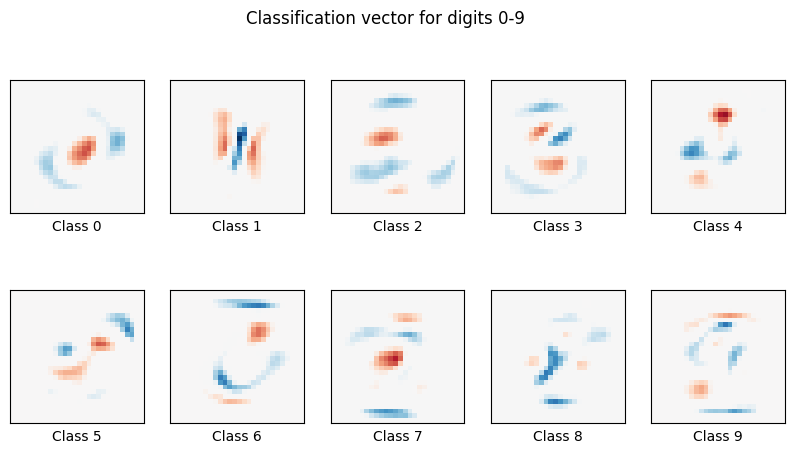

In [12]:
#clf.coef_ contains the weights learned by the LR model for each class
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10): #The dataset has 10 classes (digits 0–9 for MNIST)
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for digits 0-9')
plt.show()

<Figure size 800x600 with 0 Axes>

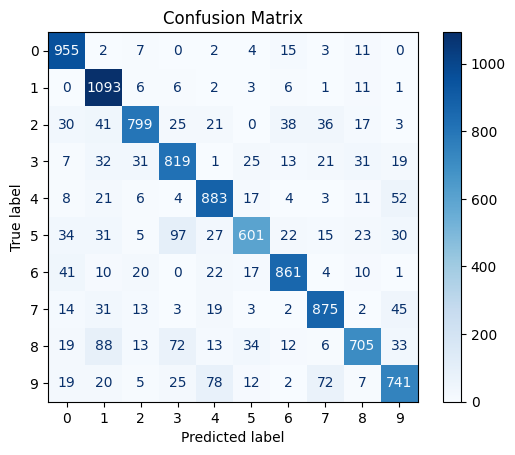

In [13]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels for the test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [17]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.95      0.90       999
           1       0.80      0.97      0.88      1129
           2       0.88      0.79      0.83      1010
           3       0.78      0.82      0.80       999
           4       0.83      0.88      0.85      1009
           5       0.84      0.68      0.75       885
           6       0.88      0.87      0.88       986
           7       0.85      0.87      0.86      1007
           8       0.85      0.71      0.77       995
           9       0.80      0.76      0.78       981

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

